In [2]:
#QUESTION NUMBER 1






import pandas as pd
df=pd.read_csv("/home/test3/Downloads/parkinsons.csv")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [5]:
res=df.isna().sum()
print(res)

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [8]:
pip install scikit-learn

     |████████████████████████████████| 11.1 MB 433 kB/s eta 0:00:01
     |████████████████████████████████| 301 kB 10.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc

In [7]:
#LINEAR REGRESSION

X = df.drop(columns=['status','name'])  
y = df['status']                


In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()


model.fit(X_train, y_train)


LinearRegression()

In [10]:

y_pred = model.predict(X_test)


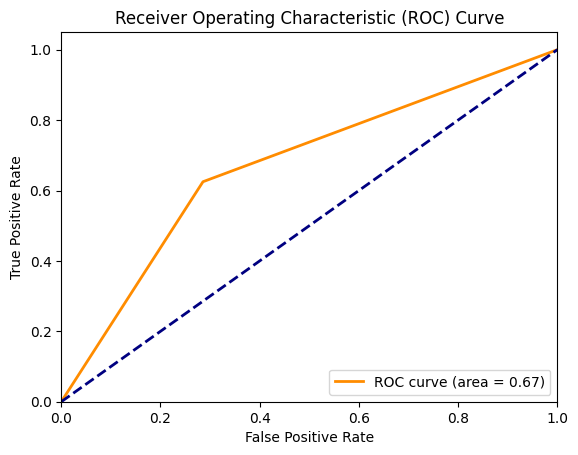

In [103]:
threshold = np.mean(y_pred)  


y_pred_binary = np.where(y_pred > threshold, 1, 0)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)


roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 0.2718603270316958
Mean Squared Error: 0.126552916997353
Root Mean Squared Error: 0.35574276801834354
R-squared: 0.14068309485279507


In [22]:
y_pred = model.predict(X_test)


In [ ]:
#the r squared score 0.14 is very low for the model.

In [104]:
#MLP CLASSIFIER

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [111]:
import pandas as pd


df = pd.read_csv("/home/test3/Downloads/parkinsons.csv")

X = df.drop(columns=['status','name'])  
y = df['status']                 


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)


mlp.fit(X_train, y_train)


/home/test3/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=42)

In [114]:

y_pred2 = mlp.predict(X_test)


accuracy_mlp = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy_mlp)


Accuracy: 0.8461538461538461


In [ ]:
#mlp classifier gives high accuracy value because it is a good model for classification problems

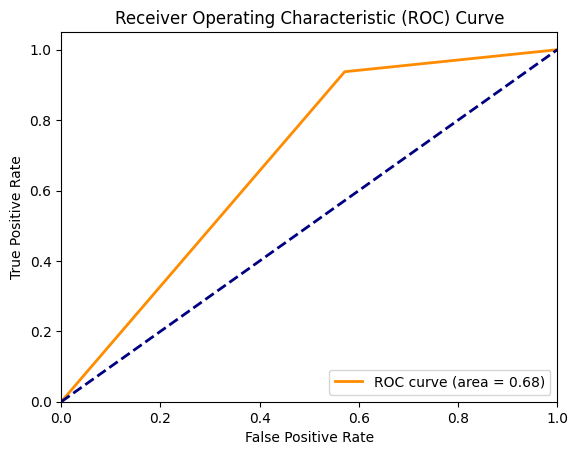

In [115]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)


roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [116]:
#KNN CLASSIFIER

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [122]:

df = pd.read_csv("/home/test3/Downloads/parkinsons.csv")


X = df.drop(columns=['status','name'])  
y = df['status']                


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:

knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train, y_train)


KNeighborsClassifier()

In [125]:

y_pred3 = knn.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy_knn)


Accuracy: 0.8205128205128205


In [ ]:
#knn model gives good accuracy in classification problems. hence it can be used here.

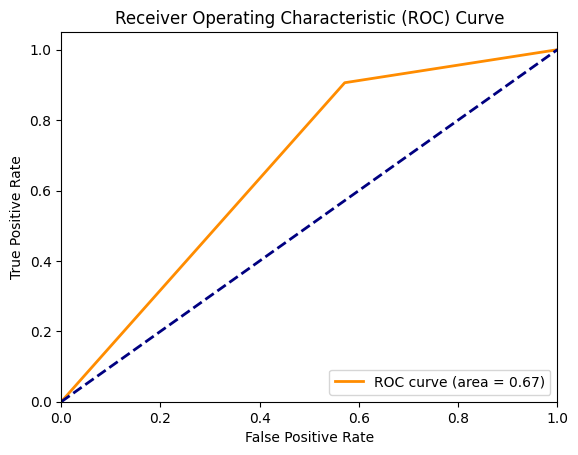

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)


roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [127]:
#SVM CLASSIFIER

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [128]:

df = pd.read_csv("/home/test3/Downloads/parkinsons.csv")


X = df.drop(columns=['status','name'])  
y = df['status']                


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:

svm = SVC(kernel='linear')


svm.fit(X_train, y_train)


SVC(kernel='linear')

In [133]:

y_pred4 = svm.predict(X_test)


accuracy_svc = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy_svc)


Accuracy: 0.8717948717948718


In [ ]:
#the  most suitable model for this dataset is svm model with an accuracy of 87%
#svm performed better than logistic regression because support vector machine model is based on statistical data
#svm performs better on small and complex datasets.

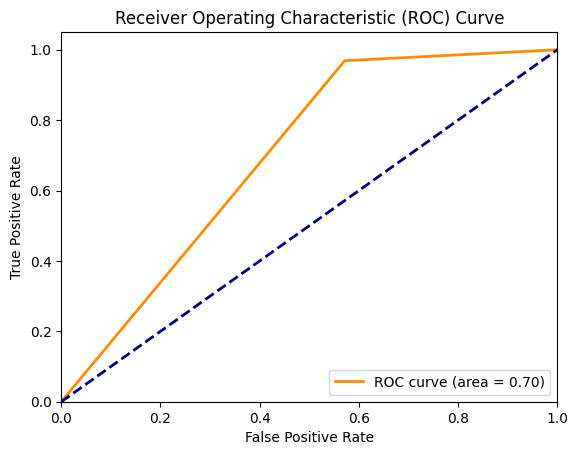

In [134]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)


roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [135]:
#NAIVE BAYES

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score


In [136]:

df = pd.read_csv("/home/test3/Downloads/parkinsons.csv")


X = df.drop(columns=['status','name'])
y = df['status']                 


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [138]:

nb = GaussianNB()


nb.fit(X_train, y_train)


GaussianNB()

In [139]:

y_pred5 = nb.predict(X_test)


accuracy_nb = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy_nb)


Accuracy: 0.6923076923076923


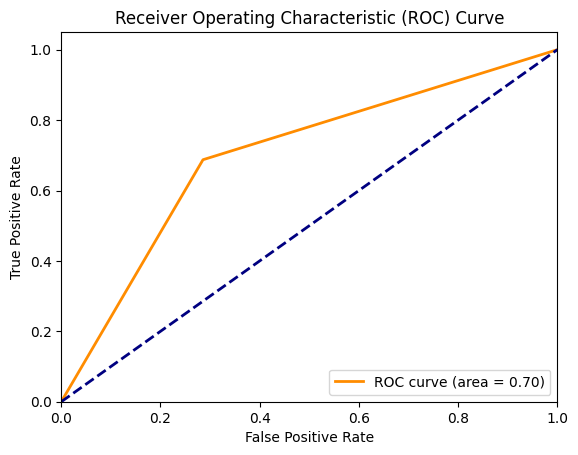

In [140]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred5)


roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [90]:
#PERCEPTRON LEARNING ALGORITHM

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv("/home/test3/Downloads/parkinsons.csv")


X = df.drop(columns=['status','name']) 
y = df['status']                


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pla = SGDClassifier(loss='perceptron', max_iter=1000, tol=1e-3)


pla.fit(X_train, y_train)


y_pred = pla.predict(X_test)


accuracy_pla = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_pla)


Accuracy: 0.1794871794871795


In [91]:
print("LR ACCURACY: ",r2)
print("PLA ACCURACY: ",accuracy_pla)
print("MLP ACCURACY: ",accuracy_mlp)
print("KNN ACCURACY: ",accuracy_knn)
print("SVM ACCURACY: ",accuracy_svc)
print("NAIVE BAYES ACCURACY: ",accuracy_nb)

LR ACCURACY:  0.14068309485279507
PLA ACCURACY:  0.1794871794871795
MLP ACCURACY:  0.8461538461538461
KNN ACCURACY:  0.8205128205128205
SVM ACCURACY:  0.8717948717948718
NAIVE BAYES ACCURACY:  0.6923076923076923


In [ ]:
#the  most suitable model for this dataset is svm model with an accuracy of 87%
#svm performed better than logistic regression because support vector machine model is based on statistical data
#svm performs better on small and complex datasets.